In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import skew, kurtosis, norm
import seaborn as sns
import warnings
import re

In [274]:
spot_file = "assignment_spot_rates.xlsx" 

xls = pd.ExcelFile(spot_file)
print(xls.sheet_names)

['daily_spot_1', 'daily_spot_2']


In [275]:
spot1_raw = pd.read_excel(spot_file, sheet_name="daily_spot_1")
spot2_raw = pd.read_excel(spot_file, sheet_name="daily_spot_2")

spot1_raw.head()

,NaN,AUSTRALIAN $ TO UK £ (WMR) - BID SPOT,AUSTRALIAN $ TO UK £ (WMR) - EXCHANGE RATE,AUSTRALIAN $ TO UK £ (WMR) - SPOT OFFERED,BRAZILIAN REAL TO UK £ (WMR) - BID SPOT,BRAZILIAN REAL TO UK £ (WMR) - EXCHANGE RATE,BRAZILIAN REAL TO UK £ (WMR) - SPOT OFFERED,BULGARIAN LEV TO UK £ (WMR) - BID SPOT,BULGARIAN LEV TO UK £ (WMR) - EXCHANGE RATE,BULGARIAN LEV TO UK £ (WMR) - SPOT OFFERED,...,ISRAELI SHEKEL TO UK £ (WMR) - SPOT OFFERED,JAPANESE YEN TO UK £ (WMR) - BID SPOT,JAPANESE YEN TO UK £ (WMR) - EXCHANGE RATE,JAPANESE YEN TO UK £ (WMR) - SPOT OFFERED,MEXICAN PESO TO UK £ (WMR) - BID SPOT,MEXICAN PESO TO UK £ (WMR) - EXCHANGE RATE,MEXICAN PESO TO UK £ (WMR) - SPOT OFFERED,NEW ZEALAND $ TO UK £ (WMR) - BID SPOT,NEW ZEALAND $ TO UK £ (WMR) - EXCHANGE RATE,NEW ZEALAND $ TO UK £ (WMR) - SPOT OFFERED
0,Code,AUSTDOL(EB),AUSTDOL(ER),AUSTDOL(EO),BRACRUZ(EB),BRACRUZ(ER),BRACRUZ(EO),BULGLEV(EB),BULGLEV(ER),BULGLEV(EO),...,ISRSHEK(EO),JAPAYEN(EB),JAPAYEN(ER),JAPAYEN(EO),MEXPESO(EB),MEXPESO(ER),MEXPESO(EO),NZDOLLR(EB),NZDOLLR(ER),NZDOLLR(EO)
1,1998-01-01 00:00:00,2.5239,2.5253,2.5266,1.8359,1.8363,1.8367,NaN,2.93695,NaN,...,5.8281,213.863,213.9367,214.0103,13.2546,13.2649,13.2751,2.8315,2.8337,2.8358
2,1998-01-02 00:00:00,2.5226,2.52435,2.5261,1.8298,1.831,1.8322,NaN,2.92865,NaN,...,5.8254,216.9985,217.1057,217.2128,13.2151,13.2233,13.2314,2.8407,2.84325,2.8458
3,1998-01-05 00:00:00,2.5466,2.5486,2.5506,1.8282,1.8288,1.8293,NaN,2.97078,NaN,...,5.8337,219.2239,219.3266,219.4293,13.1711,13.1785,13.1858,2.8745,2.877,2.8795
4,1998-01-06 00:00:00,2.5794,2.5809,2.5825,1.8219,1.8224,1.8228,NaN,2.96771,NaN,...,5.8153,218.0204,218.1488,218.2772,13.1253,13.1322,13.1391,2.8909,2.8933,2.8957


In [276]:
def clean_spot_sheet(df):
    df = df.copy()

    #Rename first column date
    first_col = df.columns[0]
    df = df.rename(columns={first_col:"Date"})

    #Delete first row
    df = df.drop(index=0)

    #convert Date in datetime
    df["Date"] = pd.to_datetime(df["Date"])

    #Set Date as the index
    df = df.set_index("Date")

    #Keep only columns containing mid-rates
    df = df[[c for c in df.columns if "EXCHANGE RATE" in c]]

    return df

spot1 = clean_spot_sheet(spot1_raw)
spot1.head()

,AUSTRALIAN $ TO UK £ (WMR) - EXCHANGE RATE,BRAZILIAN REAL TO UK £ (WMR) - EXCHANGE RATE,BULGARIAN LEV TO UK £ (WMR) - EXCHANGE RATE,CANADIAN $ TO UK £ (WMR) - EXCHANGE RATE,CHILEAN PESO TO UK £ (WMR) - EXCHANGE RATE,CROATIAN KUNA TO UK £ (WMR) - EXCHANGE RATE,US $ TO EURO (WMR) - EXCHANGE RATE,HUNGARIAN FORINT TO UK £ (WMR) - EXCHANGE RATE,INDIAN RUPEE TO UK £ (WMR) - EXCHANGE RATE,INDONESIAN RUPIAH TO UK £ (WMR) - EXCHANGE RATE,ISRAELI SHEKEL TO UK £ (WMR) - EXCHANGE RATE,JAPANESE YEN TO UK £ (WMR) - EXCHANGE RATE,MEXICAN PESO TO UK £ (WMR) - EXCHANGE RATE,NEW ZEALAND $ TO UK £ (WMR) - EXCHANGE RATE
Date,,,,,,,,,,,,,,
1998-01-01,2.5253,1.8363,2.93695,2.3546,721.4861,10.4019,1.09073,336.0215,64.51418,9041.188,5.8202,213.9367,13.2649,2.8337
1998-01-02,2.52435,1.831,2.92865,2.3391,721.99,10.3985,1.08749,335.8594,64.49599,9844.242,5.8178,217.1057,13.2233,2.84325
1998-01-05,2.5486,1.8288,2.97078,2.3341,722.2129,10.4663,1.07897,336.9861,64.56908,11183.47,5.8271,219.3266,13.1785,2.877
1998-01-06,2.5809,1.8224,2.96771,2.3369,725.72,10.4565,1.07584,336.408,64.42409,12409.69,5.8089,218.1488,13.1322,2.8933
1998-01-07,2.5393,1.8147,2.96011,2.3284,729.4678,10.4354,1.07415,335.1243,64.3118,12915.98,5.7841,214.5676,13.0915,2.8472


In [277]:
#Iterate for the second sheet
spot2 = clean_spot_sheet(spot2_raw)

#Merge both sheets
spot = pd.concat([spot1, spot2], axis=1)

print(spot.shape)
spot.head()

(6995, 25)


,AUSTRALIAN $ TO UK £ (WMR) - EXCHANGE RATE,BRAZILIAN REAL TO UK £ (WMR) - EXCHANGE RATE,BULGARIAN LEV TO UK £ (WMR) - EXCHANGE RATE,CANADIAN $ TO UK £ (WMR) - EXCHANGE RATE,CHILEAN PESO TO UK £ (WMR) - EXCHANGE RATE,CROATIAN KUNA TO UK £ (WMR) - EXCHANGE RATE,US $ TO EURO (WMR) - EXCHANGE RATE,HUNGARIAN FORINT TO UK £ (WMR) - EXCHANGE RATE,INDIAN RUPEE TO UK £ (WMR) - EXCHANGE RATE,INDONESIAN RUPIAH TO UK £ (WMR) - EXCHANGE RATE,...,PHILIPPINE PESO TO UK £ (WMR) - EXCHANGE RATE,POLISH ZLOTY TO UK £ (WMR) - EXCHANGE RATE,RUSSIAN ROUBLE TO UK £ (WMR) - EXCHANGE RATE,SINGAPORE $ TO UK £ (WMR) - EXCHANGE RATE,SOUTH AFRICA RAND TO UK £ (WMR) - EXCHANGE RATE,SWEDISH KRONA TO UK £ (WMR) - EXCHANGE RATE,SWISS FRANC TO UK £ (WMR) - EXCHANGE RATE,THAI BAHT TO UK £ (WMR) - EXCHANGE RATE,US $ TO UK £ (WMR) - EXCHANGE RATE,CZECH KORUNA TO UK £ (WMR) - EXCHANGE RATE
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,2.5253,1.8363,2.93695,2.3546,721.4861,10.4019,1.09073,336.0215,64.51418,9041.188,...,65.64948,5.7999,9.87,2.7724,8.0071,13.0552,2.3999,79.22368,1.64535,57.05008
1998-01-02,2.52435,1.831,2.92865,2.3391,721.99,10.3985,1.08749,335.8594,64.49599,9844.242,...,67.51488,5.7876,9.8442,2.783,8.0091,13.0729,2.4075,78.99988,1.6407,57.3212
1998-01-05,2.5486,1.8288,2.97078,2.3341,722.2129,10.4663,1.07897,336.9861,64.56908,11183.47,...,69.72249,5.7843,9.83,2.8217,8.05045,13.1185,2.42055,81.76619,1.6386,58.21869
1998-01-06,2.5809,1.8224,2.96771,2.3369,725.72,10.4565,1.07584,336.408,64.42409,12409.69,...,73.0701,5.7632,9.7955,2.8706,8.0703,13.1541,2.4118,85.23479,1.63285,58.82668
1998-01-07,2.5393,1.8147,2.96011,2.3284,729.4678,10.4354,1.07415,335.1243,64.3118,12915.98,...,73.67798,5.7456,9.7463,2.8261,8.0062,13.0852,2.4012,86.10648,1.62465,58.16739


In [278]:
#Identify currency pairs from column names



def parse_pair(col):
    #Convert the column name to a string (in case)
    col = str(col)
    
    #Use a regular expression to extract the currencies before "TO"
    match = re.match(r"(.+?) TO (.+?) \(", col)
    
    #If the column name matches the expected pattern
    if match:
        base = match.group(1).strip()   #currency on the left
        quote = match.group(2).strip()  #currency on the right
        return base, quote
    
    #If the column does not match, return empty values
    return None, None

#Apply to every column in the spot dataframe
pairs = {col: parse_pair(col) for col in spot.columns}

#Display 
pairs

{'AUSTRALIAN $ TO UK £ (WMR) - EXCHANGE RATE': ('AUSTRALIAN $', 'UK £'),
 'BRAZILIAN REAL TO UK £ (WMR) - EXCHANGE RATE': ('BRAZILIAN REAL', 'UK £'),
 'BULGARIAN LEV TO UK £ (WMR) - EXCHANGE RATE': ('BULGARIAN LEV', 'UK £'),
 'CANADIAN $ TO UK £ (WMR) - EXCHANGE RATE': ('CANADIAN $', 'UK £'),
 'CHILEAN PESO TO UK £ (WMR) - EXCHANGE RATE': ('CHILEAN PESO', 'UK £'),
 'CROATIAN KUNA TO UK £ (WMR) - EXCHANGE RATE': ('CROATIAN KUNA', 'UK £'),
 'US $ TO EURO (WMR) - EXCHANGE RATE': ('US $', 'EURO'),
 'HUNGARIAN FORINT TO UK £ (WMR) - EXCHANGE RATE': ('HUNGARIAN FORINT',
  'UK £'),
 'INDIAN RUPEE TO UK £ (WMR) - EXCHANGE RATE': ('INDIAN RUPEE', 'UK £'),
 'INDONESIAN RUPIAH TO UK £ (WMR) - EXCHANGE RATE': ('INDONESIAN RUPIAH',
  'UK £'),
 'ISRAELI SHEKEL TO UK £ (WMR) - EXCHANGE RATE': ('ISRAELI SHEKEL', 'UK £'),
 'JAPANESE YEN TO UK £ (WMR) - EXCHANGE RATE': ('JAPANESE YEN', 'UK £'),
 'MEXICAN PESO TO UK £ (WMR) - EXCHANGE RATE': ('MEXICAN PESO', 'UK £'),
 'NEW ZEALAND $ TO UK £ (WMR) - EXCHA

In [279]:
#Extract the lists of base and quote currencies

#List of base currencies
base_currencies = sorted({base for base, quote in pairs.values() if base is not None})

#List of quote currencies
quote_currencies = sorted({quote for base, quote in pairs.values() if quote is not None})


base_currencies, quote_currencies

(['AUSTRALIAN $',
  'BRAZILIAN REAL',
  'BULGARIAN LEV',
  'CANADIAN $',
  'CHILEAN PESO',
  'CROATIAN KUNA',
  'CZECH KORUNA',
  'HUNGARIAN FORINT',
  'INDIAN RUPEE',
  'INDONESIAN RUPIAH',
  'ISRAELI SHEKEL',
  'JAPANESE YEN',
  'MEXICAN PESO',
  'NEW ZEALAND $',
  'NORWEGIAN KRONE',
  'PHILIPPINE PESO',
  'POLISH ZLOTY',
  'RUSSIAN ROUBLE',
  'SINGAPORE $',
  'SOUTH AFRICA RAND',
  'SWEDISH KRONA',
  'SWISS FRANC',
  'THAI BAHT',
  'US $'],
 ['EURO', 'UK £'])

In [280]:
#Load the forward Excel file

warnings.simplefilter("ignore", UserWarning)

fwd1_raw = pd.read_excel("assignment_fwd_rates.xlsx", sheet_name="fwd1")
fwd2_raw = pd.read_excel("assignment_fwd_rates.xlsx", sheet_name="fwd2")
fwd3_raw = pd.read_excel("assignment_fwd_rates.xlsx", sheet_name="fwd3")

In [281]:
#Clea and concat the fwds

def clean_fwd_sheet(df):
    df = df.copy()

    df = df.rename(columns={df.columns[0]: "Date"})
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df.set_index("Date")

    # keep only mid (EXCHANGE RATE)
    df = df[[c for c in df.columns if "EXCHANGE RATE" in c and "1M FWD" in c]]

    return df

fwd2 = clean_fwd_sheet(fwd2_raw)
fwd3 = clean_fwd_sheet(fwd3_raw)

fwd_raw = pd.concat([fwd2, fwd3], axis=1)

In [282]:
#normalize the fwd to match with the spot dataframe 

normalize = {
    "AUSTRALIAN $": "AUSTRALIAN $", "AUD": "AUSTRALIAN $",
    "BRAZILIAN REAL": "BRAZILIAN REAL", "BRL": "BRAZILIAN REAL",
    "BULG. LEV": "BULGARIAN LEV", "BGN": "BULGARIAN LEV",
    "CANADIAN $": "CANADIAN $", "CAD": "CANADIAN $",
    "CHILEAN PESO": "CHILEAN PESO", "CLP": "CHILEAN PESO",
    "CROATIAN KUNA": "CROATIAN KUNA", "HRK": "CROATIAN KUNA",
    "US $": "US $", "USD": "US $",
    "EURO": "EURO", "EUR": "EURO",        
    "HUNGARIAN HUF": "HUNGARIAN FORINT", "HUF": "HUNGARIAN FORINT",
    "INDIAN RUPEE": "INDIAN RUPEE", "INR": "INDIAN RUPEE",
    "INDONESIAN RUPIAH": "INDONESIAN RUPIAH", "IDR": "INDONESIAN RUPIAH",
    "ISRAELI SHEKEL": "ISRAELI SHEKEL", "ILS": "ISRAELI SHEKEL",
    "JAPANESE YEN": "JAPANESE YEN", "JPY": "JAPANESE YEN",
    "MEXICAN PESO": "MEXICAN PESO", "MXN": "MEXICAN PESO",
    "NEW ZEALAND $": "NEW ZEALAND $", "NZD": "NEW ZEALAND $",
    "NORWEGIAN KRONE": "NORWEGIAN KRONE", "NOK": "NORWEGIAN KRONE",
    "PHILIPPINE PESO": "PHILIPPINE PESO", "PHP": "PHILIPPINE PESO",
    "POLISH ZLOTY": "POLISH ZLOTY", "PLN": "POLISH ZLOTY",
    "RUSSIAN ROUBLE": "RUSSIAN ROUBLE", "RUB": "RUSSIAN ROUBLE",
    "SINGAPORE $": "SINGAPORE $", "SGD": "SINGAPORE $",
    "SOUTH AFRICA RAND": "SOUTH AFRICA RAND", "ZAR": "SOUTH AFRICA RAND",
    "SWEDISH KRONA": "SWEDISH KRONA", "SEK": "SWEDISH KRONA",
    "SWISS FRANC": "SWISS FRANC", "CHF": "SWISS FRANC",
    "THAI BAHT": "THAI BAHT", "THB": "THAI BAHT",
    "CZECH KORUNA": "CZECH KORUNA", "CZK": "CZECH KORUNA",
}

def parse_fwd_col(col):
    col = str(col)
    m = re.search(r"([A-Z $.]+)\s+TO\s+([A-Z $.]+)", col)
    if not m:
        return None, None
    
    base = normalize.get(m.group(1).strip(), None)
    quote = normalize.get(m.group(2).strip(), None)
    return base, quote

fwd_clean = pd.DataFrame(index=fwd_raw.index)

for col in fwd_raw.columns:
    base, quote = parse_fwd_col(col)
    if base is None or quote is None:
        continue
    
    s = pd.to_numeric(fwd_raw[col], errors="coerce")
    
    if quote == "US $":
        fwd_clean[base] = s
    elif base == "US $":
        fwd_clean[quote] = 1 / s
    elif quote == "EURO":
        if "EURO" in fwd_clean.columns:
            eurusd = fwd_clean["EURO"]     # ← FIX 2
            fwd_clean[base] = s / eurusd


bgneur_cols = [c for c in fwd_raw.columns if "BGN" in c and "EXCHANGE RATE" in c]
if bgneur_cols and "EURO" in fwd_clean.columns:
    eurusd = fwd_clean["EURO"]
    bgneur = pd.to_numeric(fwd_raw[bgneur_cols[0]], errors="coerce")
    fwd_clean["BULGARIAN LEV"] = bgneur / eurusd

clpeur_cols = [c for c in fwd_raw.columns if "CLP" in c and "EXCHANGE RATE" in c]
if clpeur_cols and "EURO" in fwd_clean.columns:
    eurusd = fwd_clean["EURO"]
    clpeur = pd.to_numeric(fwd_raw[clpeur_cols[0]], errors="coerce")
    fwd_clean["CHILEAN PESO"] = clpeur / eurusd

fwd_usd = fwd_clean.apply(pd.to_numeric, errors="coerce")

fwd_usd 

,AUSTRALIAN $,BRAZILIAN REAL,CANADIAN $,CROATIAN KUNA,CZECH KORUNA,EURO,HUNGARIAN FORINT,INDIAN RUPEE,INDONESIAN RUPIAH,ISRAELI SHEKEL,...,PHILIPPINE PESO,POLISH ZLOTY,RUSSIAN ROUBLE,SINGAPORE $,SOUTH AFRICA RAND,SWEDISH KRONA,SWISS FRANC,THAI BAHT,BULGARIAN LEV,CHILEAN PESO
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,1.535037,NaN,1.4316,NaN,34.98549,0.908703,206.7900,39.2365,5540.0,NaN,...,40.7005,3.58455,NaN,1.6929,4.90750,7.92715,1.45650,48.5500,NaN,NaN
1998-02-01,1.457577,NaN,1.4516,NaN,35.14749,0.916128,210.0550,38.9255,10275.0,NaN,...,41.5860,3.59035,NaN,1.7160,4.96625,8.06140,1.46795,51.2750,NaN,NaN
1998-03-01,1.463101,NaN,1.4247,NaN,34.11249,0.916112,211.0750,39.5420,8835.0,NaN,...,40.0430,3.54035,NaN,1.6184,4.96600,7.97715,1.46027,43.8800,NaN,NaN
1998-04-01,1.519780,NaN,1.4164,NaN,34.50850,0.930241,215.8800,39.5110,8725.0,NaN,...,38.7155,3.51156,NaN,1.6231,5.08300,8.03090,1.52837,40.0500,NaN,NaN
1998-05-01,1.541117,NaN,1.4329,NaN,33.00800,0.900925,211.8750,39.7325,8320.0,NaN,...,40.6335,3.44785,NaN,1.5849,5.08700,7.69270,1.48666,39.1500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,1.493987,5.26410,1.3634,6.92225,22.62175,0.916036,360.3112,83.2188,16237.0,3.66350,...,58.7280,3.92445,90.4527,1.3452,18.55923,10.39624,0.89294,36.7005,2.132896,1081.215412
2024-07-01,1.500780,5.68060,1.3727,7.01148,23.39185,0.929912,368.2215,83.5263,16330.0,3.75788,...,58.6450,4.02077,87.8385,1.3557,18.41624,10.60091,0.89938,36.6145,2.100746,1087.251118
2024-08-01,1.537114,5.76760,1.3843,6.97115,23.43890,0.925241,367.3927,83.8088,16251.0,3.78490,...,58.3700,3.98551,86.3591,1.3350,18.32208,10.71435,0.86993,35.5175,2.113893,1094.442614


In [283]:
#Identify the USD EUR forward column (1 month)

usd_eur_fwd_cols = [c for c in fwd_clean.columns if "EURO" in c]

usd_eur_fwd_cols

['EURO']

In [284]:
#Extract the USD/EUR fwd series

usd_eur_fwd = fwd_clean[usd_eur_fwd_cols[0]]

usd_eur_fwd.head()

Date
1998-01-01    0.908703
1998-02-01    0.916128
1998-03-01    0.916112
1998-04-01    0.930241
1998-05-01    0.900925
Name: EURO, dtype: float64

In [285]:
#Extract the required spot cross-rates

usd_gbp_spot = spot[[c for c in spot.columns if "US $" in c and "UK £" in c]].iloc[:,0]
usd_eur_spot = spot[[c for c in spot.columns if "US $" in c and "EURO" in c]].iloc[:,0]

usd_gbp_spot.head(), usd_eur_spot.head()

(Date
 1998-01-01    1.64535
 1998-01-02     1.6407
 1998-01-05     1.6386
 1998-01-06    1.63285
 1998-01-07    1.62465
 Name: US $ TO UK £ (WMR) - EXCHANGE RATE, dtype: object,
 Date
 1998-01-01    1.09073
 1998-01-02    1.08749
 1998-01-05    1.07897
 1998-01-06    1.07584
 1998-01-07    1.07415
 Name: US $ TO EURO (WMR) - EXCHANGE RATE, dtype: object)

In [286]:
#Build Currency/USD for all currencies

fx_usd = pd.DataFrame(index=spot.index)

for col in spot.columns:

    base, quote = pairs[col]

    series = spot[col]

    if quote == 'UK £':
        fx_usd[base] = series/usd_gbp_spot

    elif quote == "EURO":
        fx_usd[base] = series/usd_eur_spot

#Display
fx_usd.shape, fx_usd.head()

((6995, 24),
            AUSTRALIAN $ BRAZILIAN REAL BULGARIAN LEV CANADIAN $ CHILEAN PESO  \
 Date                                                                           
 1998-01-01      1.53481       1.116054         1.785   1.431063   438.500076   
 1998-01-02     1.538581       1.115987         1.785   1.425672   440.049979   
 1998-01-05     1.555352       1.116075      1.812999   1.424448   440.749969   
 1998-01-06     1.580611       1.116085      1.817503   1.431179   444.449888   
 1998-01-07     1.562983       1.116979      1.821999    1.43317   448.999969   
 
            CROATIAN KUNA US $ HUNGARIAN FORINT INDIAN RUPEE INDONESIAN RUPIAH  \
 Date                                                                            
 1998-01-01      6.321998  1.0       204.224937    39.210004        5494.99377   
 1998-01-02      6.337844  1.0       204.704943    39.310044       6000.025599   
 1998-01-05      6.387343  1.0       205.654888    39.405029       6825.015257   
 1998-01

In [287]:
#converts strings in numbers and converts bad values in NaN to ensures the whole DataFrame is float64 (required for .log)
fx_usd = fx_usd.apply(pd.to_numeric, errors='coerce')

fx_usd.dtypes

AUSTRALIAN $         float64
BRAZILIAN REAL       float64
BULGARIAN LEV        float64
CANADIAN $           float64
CHILEAN PESO         float64
CROATIAN KUNA        float64
US $                 float64
HUNGARIAN FORINT     float64
INDIAN RUPEE         float64
INDONESIAN RUPIAH    float64
ISRAELI SHEKEL       float64
JAPANESE YEN         float64
MEXICAN PESO         float64
NEW ZEALAND $        float64
NORWEGIAN KRONE      float64
PHILIPPINE PESO      float64
POLISH ZLOTY         float64
RUSSIAN ROUBLE       float64
SINGAPORE $          float64
SOUTH AFRICA RAND    float64
SWEDISH KRONA        float64
SWISS FRANC          float64
THAI BAHT            float64
CZECH KORUNA         float64
dtype: object

In [288]:
#Compute daily log returns for all currencies

fx_r = np.log(fx_usd/fx_usd.shift(1))

#Remove the first row (all NaN)
fx_r = fx_r.dropna()

fx_r.head(), fx_r.shape

(            AUSTRALIAN $  BRAZILIAN REAL  BULGARIAN LEV  CANADIAN $  \
 Date                                                                  
 1998-01-02      0.002454       -0.000060   8.560482e-08   -0.003774   
 1998-01-05      0.010841        0.000079   1.556374e-02   -0.000859   
 1998-01-06      0.016109        0.000010   2.481331e-03    0.004714   
 1998-01-07     -0.011215        0.000800   2.470364e-03    0.001391   
 1998-01-08      0.004917        0.000735  -4.399056e-03   -0.000619   
 
             CHILEAN PESO  CROATIAN KUNA  US $  HUNGARIAN FORINT  INDIAN RUPEE  \
 Date                                                                            
 1998-01-02      0.003528       0.002503   0.0          0.002348      0.002548   
 1998-01-05      0.001589       0.007780   0.0          0.004630      0.002413   
 1998-01-06      0.008360       0.002578   0.0          0.001798      0.001267   
 1998-01-07      0.010186       0.003015   0.0          0.001211      0.003290   
 1

In [289]:
#4-Day Momentum Signal
MoM_4d = fx_r.rolling(4).sum().dropna()

MoM_4d.head()

,AUSTRALIAN $,BRAZILIAN REAL,BULGARIAN LEV,CANADIAN $,CHILEAN PESO,CROATIAN KUNA,US $,HUNGARIAN FORINT,INDIAN RUPEE,INDONESIAN RUPIAH,...,NORWEGIAN KRONE,PHILIPPINE PESO,POLISH ZLOTY,RUSSIAN ROUBLE,SINGAPORE $,SOUTH AFRICA RAND,SWEDISH KRONA,SWISS FRANC,THAI BAHT,CZECH KORUNA
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-07,0.018189,0.000828,0.020516,0.001471,0.023663,0.015876,0.0,0.009987,0.009519,0.369335,...,0.018357,0.128035,0.003254,0.000049,0.031845,0.012548,0.014956,0.013202,0.095970,0.032056
1998-01-08,0.020652,0.001623,0.016116,0.004627,0.051918,0.008045,0.0,0.005019,0.008486,0.520775,...,0.012338,0.087771,0.003532,-0.000082,0.049071,0.012621,0.007235,0.002107,0.104891,0.023786
1998-01-09,-0.003765,0.000971,0.003304,-0.000713,0.043836,0.002980,0.0,0.002186,0.007206,0.271068,...,0.004165,0.049294,0.003530,0.000080,0.029449,0.005278,-0.001313,-0.000352,0.083122,0.009482
1998-01-12,-0.012397,0.002718,-0.000554,0.001828,0.041969,-0.001198,0.0,-0.000049,0.007827,0.169078,...,0.007424,-0.021457,0.005786,0.000750,0.026369,0.009669,-0.001911,-0.000923,0.082692,-0.001721
1998-01-13,-0.009732,0.001009,-0.001097,0.000533,0.016567,-0.004814,0.0,0.000292,0.007549,0.084389,...,0.004031,-0.040501,0.000987,0.001001,0.017393,0.009707,-0.003561,-0.000008,0.050137,-0.004311


In [290]:
#Momemtum signal at month-end

MoM_m = MoM_4d.resample('ME').last()

MoM_m.head()

,AUSTRALIAN $,BRAZILIAN REAL,BULGARIAN LEV,CANADIAN $,CHILEAN PESO,CROATIAN KUNA,US $,HUNGARIAN FORINT,INDIAN RUPEE,INDONESIAN RUPIAH,...,NORWEGIAN KRONE,PHILIPPINE PESO,POLISH ZLOTY,RUSSIAN ROUBLE,SINGAPORE $,SOUTH AFRICA RAND,SWEDISH KRONA,SWISS FRANC,THAI BAHT,CZECH KORUNA
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,-0.021530,0.001789,0.024685,0.009277,-0.000549,0.022099,0.0,0.017063,0.006979,-0.312379,...,0.019752,-0.013972,0.011935,-0.001365,-0.020756,0.007827,0.024154,0.015634,-0.036300,0.017172
1998-02-28,-0.020160,0.000991,0.010575,-0.000164,-0.004880,0.010565,0.0,0.007310,0.003691,-0.081345,...,0.006174,-0.017391,-0.017098,-0.001574,-0.020475,-0.000402,-0.000457,0.010997,-0.035332,0.003536
1998-03-31,0.010954,0.001360,0.012660,0.007067,0.005525,0.015022,0.0,0.010462,-0.000569,0.032309,...,0.008300,0.022683,0.005968,0.001152,0.009959,0.013494,0.009612,0.020904,0.023197,0.010590
1998-04-30,-0.001599,0.000259,0.000643,-0.003940,-0.000442,0.001079,0.0,0.002136,0.000503,0.018751,...,-0.000319,0.041964,0.000739,0.001467,-0.004412,0.000105,0.004676,0.003527,-0.004514,-0.005371
1998-05-31,-0.001949,-0.001612,0.008961,0.003903,0.003082,0.011364,0.0,0.011984,0.017427,0.049901,...,0.010239,0.009028,0.020987,-0.000734,0.015202,0.002811,0.014346,0.003938,0.028631,0.024302


In [291]:
#Rank Currencies into 5 Portfolios (P1.P5)

ranks = MoM_m.rank(axis=1, method='first', ascending=True)

P1_list = ranks.apply(lambda row: list(row.nlargest(5).index), axis=1)
P5_list = ranks.apply(lambda row: list(row.nsmallest(5).index), axis=1)


def build_middle_portfolios(ranks, P1_list, P5_list):

    P2_list = []
    P3_list = []
    P4_list = []

    for date in ranks.index:
        #currencies not in P1 or P5
        remaining = ranks.columns[~ranks.loc[date].index.isin(P1_list[date] + P5_list[date])]

        #sort remaining
        rem_sorted = ranks.loc[date, remaining].sort_values()

        #split into 3 groups
        n = len(rem_sorted) 
        size = n // 3       
        extra = n % 3       

        #distribute extra 1 per group until exhausted
        counts = [size + (1 if i < extra else 0) for i in range(3)]

        #build portfolios
        P2_list.append(list(rem_sorted.iloc[0:counts[0]].index))
        P3_list.append(list(rem_sorted.iloc[counts[0]:counts[0]+counts[1]].index))
        P4_list.append(list(rem_sorted.iloc[counts[0]+counts[1]:].index))

    return (
        pd.Series(P2_list, index=ranks.index),
        pd.Series(P3_list, index=ranks.index),
        pd.Series(P4_list, index=ranks.index),
    )

P2_list, P3_list, P4_list = build_middle_portfolios(ranks, P1_list, P5_list)
   


for name, pf in zip(["P1","P2","P3","P4","P5"],
                    [P1_list,P2_list,P3_list,P4_list,P5_list]):
    print(name, pf.apply(len).unique())


P1 [5]
P2 [5]
P3 [5]
P4 [4]
P5 [5]


In [292]:
#Monthly Returns for Each Currency

month_r = fx_r.resample('ME').sum()
month_r = month_r.loc[MoM_m.index]

#Portfolios formed at END of month t are held during month t+1
P1_hold = P1_list.shift(1)
P2_hold = P2_list.shift(1)
P3_hold = P3_list.shift(1)
P4_hold = P4_list.shift(1)
P5_hold = P5_list.shift(1)

mask = pd.concat([P1_hold, P2_hold, P3_hold, P4_hold, P5_hold], axis=1).notna().all(axis=1)

month_r = month_r.loc[mask]
P1_hold = P1_hold.loc[mask]
P2_hold = P2_hold.loc[mask]
P3_hold = P3_hold.loc[mask]
P4_hold = P4_hold.loc[mask]
P5_hold = P5_hold.loc[mask]

month_r


,AUSTRALIAN $,BRAZILIAN REAL,BULGARIAN LEV,CANADIAN $,CHILEAN PESO,CROATIAN KUNA,US $,HUNGARIAN FORINT,INDIAN RUPEE,INDONESIAN RUPIAH,...,NORWEGIAN KRONE,PHILIPPINE PESO,POLISH ZLOTY,RUSSIAN ROUBLE,SINGAPORE $,SOUTH AFRICA RAND,SWEDISH KRONA,SWISS FRANC,THAI BAHT,CZECH KORUNA
Date,,,,,,,,,,,,,,,,,,,,,
1998-02-28,0.006026,0.006245,-0.010464,-0.026785,-0.011828,-0.004486,0.0,0.003022,0.013561,-0.170958,...,-0.001207,-0.066649,-0.018798,0.001036,-0.057528,0.000913,-0.012607,-0.005435,-0.202042,-0.037525
1998-03-31,0.026942,0.006110,0.018897,-0.000680,0.009076,0.024551,0.0,0.021850,0.003362,-0.022858,...,0.007279,-0.051427,-0.007073,0.008145,-0.003716,0.019541,-0.001491,0.038058,-0.093570,0.006611
1998-04-30,0.016967,0.006083,-0.028745,0.005756,-0.002206,-0.020627,0.0,-0.011078,0.005871,-0.068788,...,-0.022038,0.057672,-0.016502,0.005151,-0.019703,0.003466,-0.032506,-0.016260,-0.014758,-0.040398
1998-05-31,0.040104,0.005372,-0.008058,0.017035,0.004848,0.006637,0.0,0.014634,0.048172,0.336034,...,0.009910,-0.030343,0.027438,0.006507,0.055586,0.019484,0.011833,-0.014310,0.043388,0.003037
1998-06-30,0.011403,0.005572,0.011991,0.010654,0.025071,0.018554,0.0,0.021787,0.016658,0.269821,...,0.018571,0.068222,-0.001144,0.009686,0.009203,0.133097,0.018224,0.025495,0.046205,-0.010151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,-0.004200,0.055253,0.012868,0.003826,0.027044,0.012844,0.0,0.025261,-0.001004,0.007663,...,0.013804,0.001519,0.020894,-0.046717,0.002660,-0.030608,0.006908,-0.003901,-0.002517,0.026469
2024-07-31,0.022482,0.017544,-0.009618,0.009515,0.000979,-0.009610,0.0,-0.011765,0.004084,-0.007048,...,0.026597,-0.003992,-0.012935,-0.003470,-0.013114,-0.003772,0.011962,-0.020647,-0.029100,0.007000
2024-08-31,-0.038305,0.001869,-0.022742,-0.024712,-0.030028,-0.022662,0.0,-0.026537,0.001700,-0.050776,...,-0.031807,-0.038869,-0.027143,0.053226,-0.025879,-0.024274,-0.045511,-0.036784,-0.051818,-0.039930


In [293]:
#Portfolio Returns (using lagged holdings to avoid look-ahead)

P1_r = month_r.apply(lambda row: row.loc[P1_hold.loc[row.name]].mean(), axis=1)
P2_r = month_r.apply(lambda row: row.loc[P2_hold.loc[row.name]].mean(), axis=1)
P3_r = month_r.apply(lambda row: row.loc[P3_hold.loc[row.name]].mean(), axis=1)
P4_r = month_r.apply(lambda row: row.loc[P4_hold.loc[row.name]].mean(), axis=1)
P5_r = month_r.apply(lambda row: row.loc[P5_hold.loc[row.name]].mean(), axis=1)


In [294]:
#Momentum Strategy Return: long P5, short P1

MoM_r = pd.DataFrame({"P1":P1_r,"P2":P2_r,"P3":P3_r,"P4":P4_r, "P5":P5_r})

MoM_r["Momentum Strategy"] = MoM_r["P1"] - MoM_r['P5']

MoM_r.head()

,P1,P2,P3,P4,P5,Momentum Strategy
Date,,,,,,
1998-02-28,-0.004256,-0.001490,-0.004132,-0.014684,-0.098230,0.093974
1998-03-31,0.022127,0.000810,0.006146,0.004021,-0.006767,0.028894
1998-04-30,-0.010273,-0.001442,-0.017343,-0.012744,0.002750,-0.013023
1998-05-31,0.080462,0.014869,0.015912,0.011142,0.021121,0.059341
1998-06-30,0.064766,0.039759,0.023785,0.016468,0.011499,0.053267


In [295]:
#Mapping the bis and ask 

spot1_raw2 = pd.read_excel("assignment_spot_rates.xlsx", sheet_name="daily_spot_1")
spot2_raw2= pd.read_excel("assignment_spot_rates.xlsx", sheet_name="daily_spot_2")

def clean_spot_sheet_keep_all(df):
    df = df.copy()
    
    #Rename first column to Date
    first_col = df.columns[0]
    df = df.rename(columns={first_col: "Date"})
    
    #Remove metadata rows 
    if 0 in df.index and 1 in df.index:
        df = df.drop(index=[0, 1])
    
    #Convert Date to datetime
    df["Date"] = pd.to_datetime(df["Date"])
    
    #Set Date as index
    df = df.set_index("Date")
    
    return df

#Clean each sheet ONCE
spot1_clean = clean_spot_sheet_keep_all(spot1_raw2)
spot2_clean = clean_spot_sheet_keep_all(spot2_raw2)

#Merge
spot_raw = pd.concat([spot1_clean, spot2_clean], axis=1)

def map_bidask_columns(df):
    
    cols = df.columns

    #Identify BID and ASK columns using your exact naming
    bid_cols = [c for c in cols if "BID SPOT" in c]
    ask_cols = [c for c in cols if "SPOT OFFERED" in c]

    mapping = {}

    #Map BID columns
    for b in bid_cols:
        m = re.match(r"(.*?) TO", b)
        if m:
            base = m.group(1).strip()
            if df[b].notna().sum() > 10:  
                mapping.setdefault(base, {})["bid"] = b
    #Map ASK columns
    for a in ask_cols:
        m = re.match(r"(.*?) TO", a)
        if m:
            base = m.group(1).strip()
            if df[a].notna().sum() > 10:  
                mapping.setdefault(base, {})["ask"] = a

    # Keep only complete and non-empty pairs
    mapping = {k: v for k, v in mapping.items() if "bid" in v and "ask" in v}

    bid_df = pd.DataFrame({base: df[pair["bid"]] for base, pair in mapping.items()})
    ask_df = pd.DataFrame({base: df[pair["ask"]] for base, pair in mapping.items()})

    return bid_df, ask_df

bid_df, ask_df = map_bidask_columns(spot_raw)



In [296]:

""" Compute mid prices and percentage spread cost
    spread = (ask - bid) / mid"""

def compute_mid_spread(bid_df, ask_df):

    mid = (bid_df+ask_df)/2

    spread = (ask_df - bid_df) / mid

    return mid, spread

mid_df, spread_df = compute_mid_spread(bid_df, ask_df)


spread_df.shape

(6994, 24)

In [297]:
#Currencies missing spreads

#Currencies in our full universe
all_currencies = fx_r.columns

#Currencies that have real spreads
curr_with_spread = spread_df.columns

#Identify missing currencies
missing_spread= [c for c in all_currencies if c not in curr_with_spread]

#Reorder columns to match fx_r
spread_df = spread_df.reindex(columns=all_currencies)

#Compute average spread across available currencies
avg_spread = spread_df.mean(axis=1)

#Fill missing currencies with average spread
for col in spread_df.columns:
    mask = spread_df[col].isna()                  
    spread_df.loc[mask, col] = avg_spread.loc[mask]

spread_df.shape 
spread_df.head()

,AUSTRALIAN $,BRAZILIAN REAL,BULGARIAN LEV,CANADIAN $,CHILEAN PESO,CROATIAN KUNA,US $,HUNGARIAN FORINT,INDIAN RUPEE,INDONESIAN RUPIAH,...,NORWEGIAN KRONE,PHILIPPINE PESO,POLISH ZLOTY,RUSSIAN ROUBLE,SINGAPORE $,SOUTH AFRICA RAND,SWEDISH KRONA,SWISS FRANC,THAI BAHT,CZECH KORUNA
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-02,0.001386,0.001311,0.003844,0.000983,0.001745,0.007299,0.000609,0.000855,0.002135,0.033942,...,0.001288,0.0079,0.003162,0.000609,0.002084,0.001224,0.001239,0.00108,0.010994,0.001928
1998-01-05,0.001569,0.000602,0.002744,0.000857,0.001623,0.007787,0.000488,0.00073,0.00125,0.022466,...,0.001165,0.005189,0.001608,0.000814,0.001666,0.001106,0.001113,0.001281,0.004496,0.001249
1998-01-06,0.001201,0.000494,0.00297,0.000813,0.001554,0.007737,0.000429,0.000672,0.001189,0.026744,...,0.001033,0.004898,0.001857,0.000592,0.002125,0.001028,0.001049,0.001119,0.006176,0.001482
1998-01-07,0.00126,0.000386,0.002469,0.000644,0.002536,0.00689,0.000308,0.000552,0.000813,0.012887,...,0.000967,0.009128,0.001149,0.000472,0.002052,0.000912,0.001139,0.000958,0.005968,0.001425
1998-01-08,0.001379,0.000775,0.003134,0.000994,0.002776,0.008212,0.000619,0.000863,0.001375,0.020421,...,0.001283,0.010635,0.002866,0.000784,0.002327,0.001227,0.001241,0.001304,0.003424,0.001626


In [298]:
#Portfolio turnover

"""portf_list = Series(index=dates, value=list of currencies)
    returns a Series of monthly turnover counts"""

def turnover(portf_list):

    turnover = {}

    prev=None
    for d, currs in portf_list.items():
        if prev is None:
            turnover[d]=0
        else:
            turnover[d] = len(set(currs) ^ set(prev))
        prev = currs
    return pd.Series(turnover)

turn_P1 = turnover(P1_hold)
turn_P5 = turnover(P5_hold)



In [299]:
#Explicit cost

explicitc = 0.0005
nP1 = P1_hold.apply(len)
nP5 = P5_hold.apply(len)

P1_explicitc = (turn_P1 / nP1) * explicitc
P5_explicitc = (turn_P5 / nP5) * explicitc


In [300]:
#Apply implicit cost 

"""
    portf_list: currencies in portfolio per month
    turn_list: turnover count per month
    spread_df: daily spread % per currency
    """
def implicitc(portf_list, turn_list, spread_df):
    costs = []

    for d in portf_list.index:

        currs = portf_list.loc[d]
        if len(currs) == 0:
            costs.append(0)
            continue

        #use the last available spread before or on date d
        try:
            spread_row = spread_df.loc[:d].iloc[-1]   #aligned daily 
        except:
            costs.append(0)
            continue

        #mean spread of the currencies in portfolio at this date
        avg_spread = spread_row[currs].mean() / 2

        
        #number of currencies replaced
        trades = turn_list.loc[d]

        #each currency is 1/5 of the portfolio
        cost = (trades / len(currs)) * avg_spread
        costs.append(cost)

    return pd.Series(costs, index=portf_list.index)

#Convert daily spreads to monthly spreads
spread_monthly = (
    spread_df
    .resample("ME")
    .last()
    .astype(float)
    .reindex(month_r.index)
    .ffill()
    .bfill()
)

#Align to same monthly index as returns
spread_trade = spread_monthly.shift(1)

P1_implicitc = implicitc(P1_hold, turn_P1, spread_trade)
P5_implicitc = implicitc(P5_hold, turn_P5, spread_trade)





In [301]:
#Net returns

P1_cost = P1_explicitc + P1_implicitc
P5_cost = P5_explicitc + P5_implicitc

MoM_netr = pd.DataFrame(index=MoM_r.index)

MoM_netr["P1_net"] = P1_r - P1_cost
MoM_netr["P5_net"] = P5_r - P5_cost  

MoM_netr["Net Momentum"] = MoM_r["Momentum Strategy"] - (P5_cost + P1_cost)

MoM_netr.head()

,P1_net,P5_net,Net Momentum
Date,,,
1998-02-28,NaN,NaN,NaN
1998-03-31,0.020849,-0.008329,0.026056
1998-04-30,-0.017462,0.000907,-0.022055
1998-05-31,0.078232,0.017491,0.053481
1998-06-30,0.056607,0.009287,0.042896


In [302]:
#Function to compute monthly & annualized stats

def compute_stats(series):
    series = series.dropna()
    stats = {}

    #Annualized
    stats["Annualized Mean"] = series.mean() * 12
    stats["Annualized Std"]  = series.std() * np.sqrt(12)
    stats["Skew"] = skew(series, nan_policy="omit")
    stats["Kurtosis"] = kurtosis(series, nan_policy="omit")

    #Monthly
    stats["Monthly Mean"] = series.mean()
    stats["Monthly Std"]  = series.std()


    return pd.Series(stats)

def print_stats_block(title, stats):
    print(title)
    for key, value in stats.items():
        print(f"    {key:<22} {value:>12.6f}")
    print()


In [303]:
#Gross Momentum Strategy (before fees)
gross_stats = compute_stats(MoM_r["Momentum Strategy"])


#Net Momentum Strategy (After fees)
net_stats = compute_stats(MoM_netr["Net Momentum"])


print_stats_block("Gross Momentum Strategy Performance:", gross_stats)
print_stats_block("Net Momentum Strategy Performance (After Fees):", net_stats)


Gross Momentum Strategy Performance:
    Annualized Mean            0.041014
    Annualized Std             0.086314
    Skew                       1.044387
    Kurtosis                   4.263778
    Monthly Mean               0.003418
    Monthly Std                0.024917

Net Momentum Strategy Performance (After Fees):
    Annualized Mean           -0.004325
    Annualized Std             0.083247
    Skew                       0.906308
    Kurtosis                   4.100293
    Monthly Mean              -0.000360
    Monthly Std                0.024031



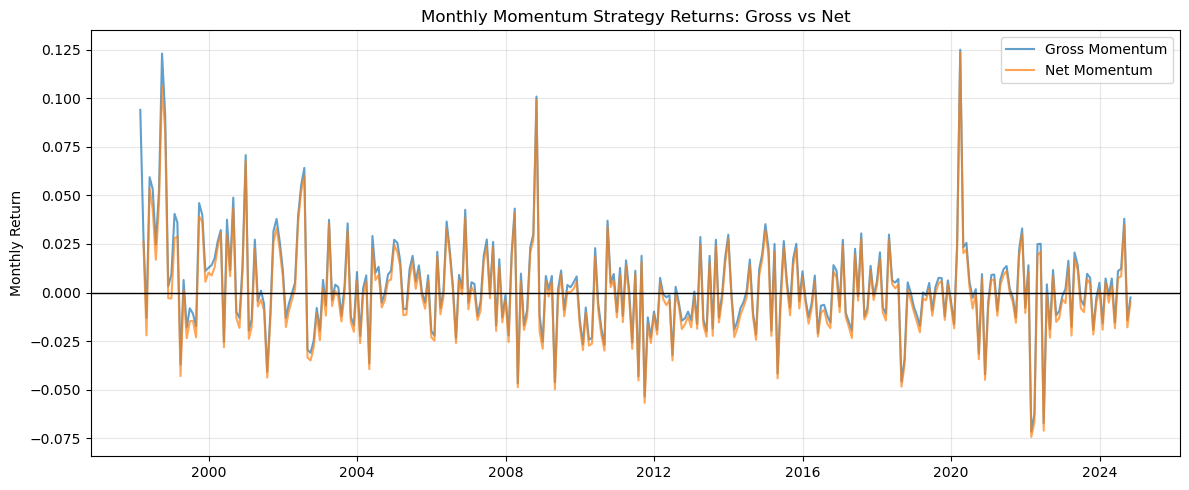

In [304]:
#Monthly returns plot

plt.figure(figsize=(12,5))

plt.plot(MoM_r.index, MoM_r["Momentum Strategy"], label="Gross Momentum", alpha=0.7)
plt.plot(MoM_netr.index, MoM_netr["Net Momentum"], label="Net Momentum", alpha=0.7)

plt.axhline(0, color='black', linewidth=1)

plt.title("Monthly Momentum Strategy Returns: Gross vs Net")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



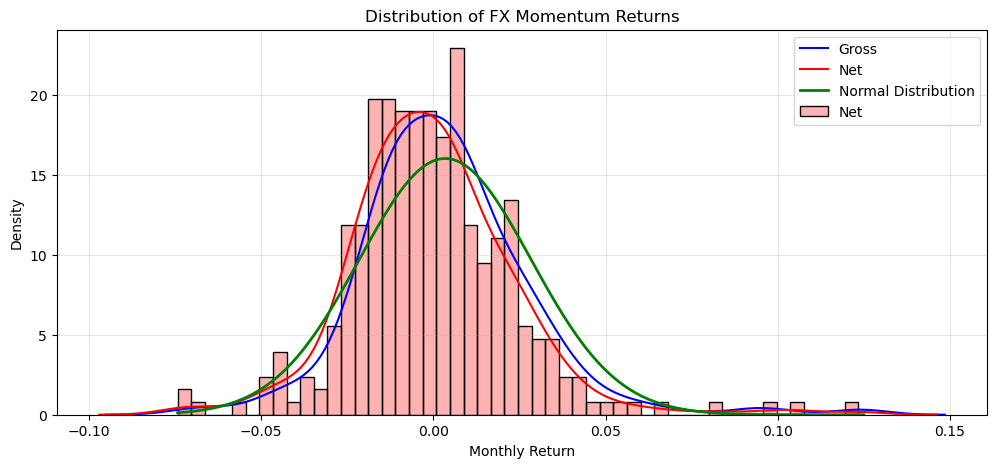

In [305]:
#Returns distribution

plt.figure(figsize=(12,5))

#Gross 
sns.kdeplot(MoM_r["Momentum Strategy"], color="blue", label="Gross")

#Net histogram 
sns.histplot(MoM_netr["Net Momentum"], bins=50, stat="density",
             alpha=0.3, color="red", label="Net")
sns.kdeplot(MoM_netr["Net Momentum"], color="red", label="Net")

#Normal distribution
mu = MoM_r["Momentum Strategy"].mean()
sigma = MoM_r["Momentum Strategy"].std()

x = np.linspace(
    min(MoM_r["Momentum Strategy"].min(), MoM_netr["Net Momentum"].min()),
    max(MoM_r["Momentum Strategy"].max(), MoM_netr["Net Momentum"].max()),
    200
)

plt.plot(x, norm.pdf(x, mu, sigma), 'green', lw=2, label="Normal Distribution")

plt.title("Distribution of FX Momentum Returns")
plt.xlabel("Monthly Return")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


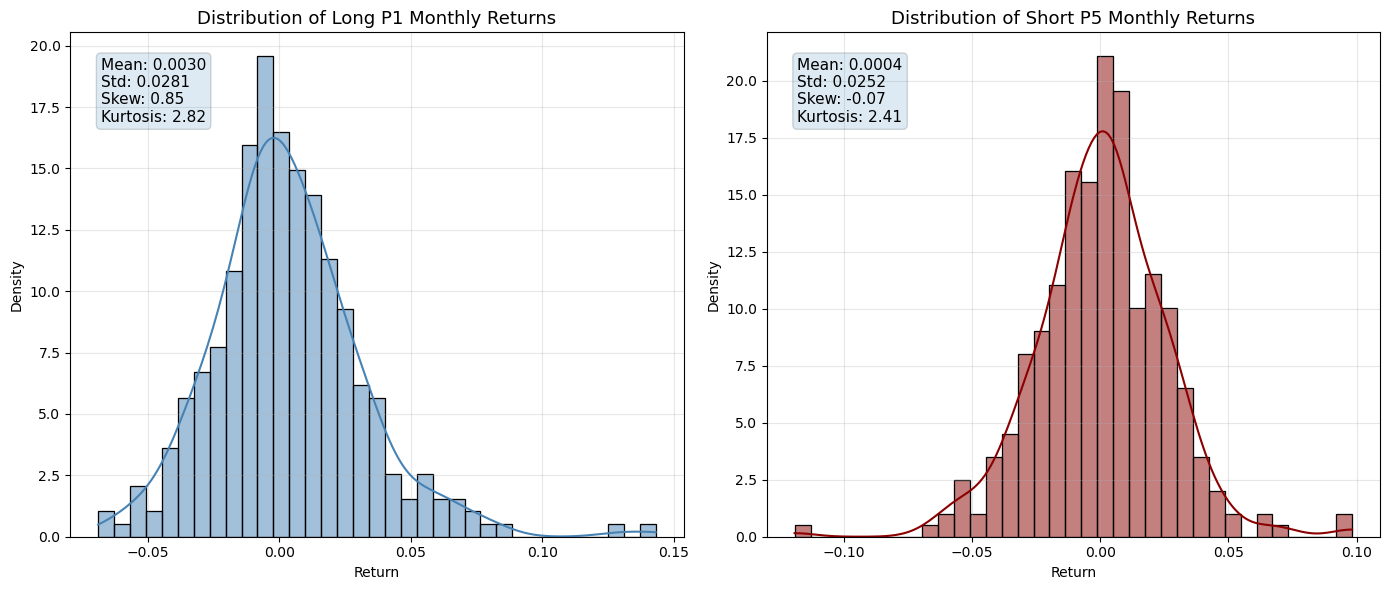

In [306]:
#Portfolios returns distribution

longP1 = P1_r.dropna()
shortP5 = -P5_r.dropna()   

plt.figure(figsize=(14,6))

#Long P1 
plt.subplot(1,2,1)
sns.histplot(longP1, bins=35, kde=True, stat="density",
             color="steelblue", edgecolor="black")
plt.title("Distribution of Long P1 Monthly Returns", fontsize=13)
plt.xlabel("Return")
plt.ylabel("Density")
plt.grid(alpha=0.3)

#Stats for text box
plt.text(0.05, 0.95,
         f"Mean: {longP1.mean():.4f}\n"
         f"Std: {longP1.std():.4f}\n"
         f"Skew: {longP1.skew():.2f}\n"
         f"Kurtosis: {longP1.kurtosis():.2f}",
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round", alpha=0.15))


#Short P5 
plt.subplot(1,2,2)
sns.histplot(shortP5, bins=35, kde=True, stat="density",
             color="darkred", edgecolor="black")
plt.title("Distribution of Short P5 Monthly Returns", fontsize=13)
plt.xlabel("Return")
plt.ylabel("Density")
plt.grid(alpha=0.3)

plt.text(0.05, 0.95,
         f"Mean: {shortP5.mean():.4f}\n"
         f"Std: {shortP5.std():.4f}\n"
         f"Skew: {shortP5.skew():.2f}\n"
         f"Kurtosis: {shortP5.kurtosis():.2f}",
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round", alpha=0.15))

plt.tight_layout()
plt.show()


In [307]:
#Defining  the Sub-Periods

sub_periods = {"Pre-Crisis (1998–2006)": ("1998-01-01", "2006-12-31"),
"Financial Crisis (2007–2009)": ("2007-01-01", "2009-12-31"),
"Post-Crisis (2010–2019)": ("2010-01-01", "2019-12-31"),
"Covid Period (2020–2021)": ("2020-01-01", "2021-12-31"),
"Post-Covid (2022–2024)": ("2022-01-01", "2024-12-31"),}


In [308]:
#Computing the Sub-Sample Stats

def compute_stats(series):
    s = series.dropna()

    stats = {}

    
    stats["Mean (monthly)"] = s.mean()
    stats["Mean (annualized)"] = (1 + s.mean())**12 - 1
    

    stats["Std (monthly)"] = s.std()
    stats["Std (annualized)"] = s.std() * (12**0.5)
    
    stats["Skew"] = skew(s)
    stats["Kurtosis"] = kurtosis(s)
    
    stats["Sharpe (annualized)"] = stats["Mean (annualized)"] / stats["Std (annualized)"]

    
    return stats


gross = MoM_r["Momentum Strategy"]      
net   = MoM_netr["Net Momentum"]        

results_gross = {}
results_net = {}

for name, (start, end) in sub_periods.items():
    results_gross[name] = compute_stats(gross.loc[start:end])
    results_net[name] = compute_stats(net.loc[start:end])


In [309]:
print("Gross Momentum Strategy (Sub-Samples)")
df_gross = pd.DataFrame(results_gross).T
display(df_gross)


Gross Momentum Strategy (Sub-Samples)


,Mean (monthly),Mean (annualized),Std (monthly),Std (annualized),Skew,Kurtosis,Sharpe (annualized)
Pre-Crisis (1998–2006),0.010827,0.137945,0.028375,0.098293,1.056464,1.894246,1.403404
Financial Crisis (2007–2009),0.003572,0.043714,0.025561,0.088546,1.240127,4.417317,0.493685
Post-Crisis (2010–2019),-0.002256,-0.026742,0.017764,0.061538,-0.074969,-0.001524,-0.434569
Covid Period (2020–2021),0.008013,0.100513,0.030558,0.105855,2.189469,7.258310,0.949529
Post-Covid (2022–2024),-0.003279,-0.038646,0.024407,0.084548,-1.352302,1.920958,-0.457090


In [310]:

print("Net Momentum Strategy (Sub-Samples)")
df_net = pd.DataFrame(results_net).T
display(df_net)


Net Momentum Strategy (Sub-Samples)


,Mean (monthly),Mean (annualized),Std (monthly),Std (annualized),Skew,Kurtosis,Sharpe (annualized)
Pre-Crisis (1998–2006),0.005700,0.070587,0.026417,0.091511,0.856420,1.351689,0.771348
Financial Crisis (2007–2009),0.000395,0.004752,0.025835,0.089496,1.285078,4.477323,0.053102
Post-Crisis (2010–2019),-0.005224,-0.060913,0.017689,0.061276,-0.084743,-0.003921,-0.994080
Covid Period (2020–2021),0.005264,0.065034,0.030774,0.106605,2.218560,7.385434,0.610044
Post-Covid (2022–2024),-0.006861,-0.079300,0.024384,0.084469,-1.358983,1.910001,-0.938806


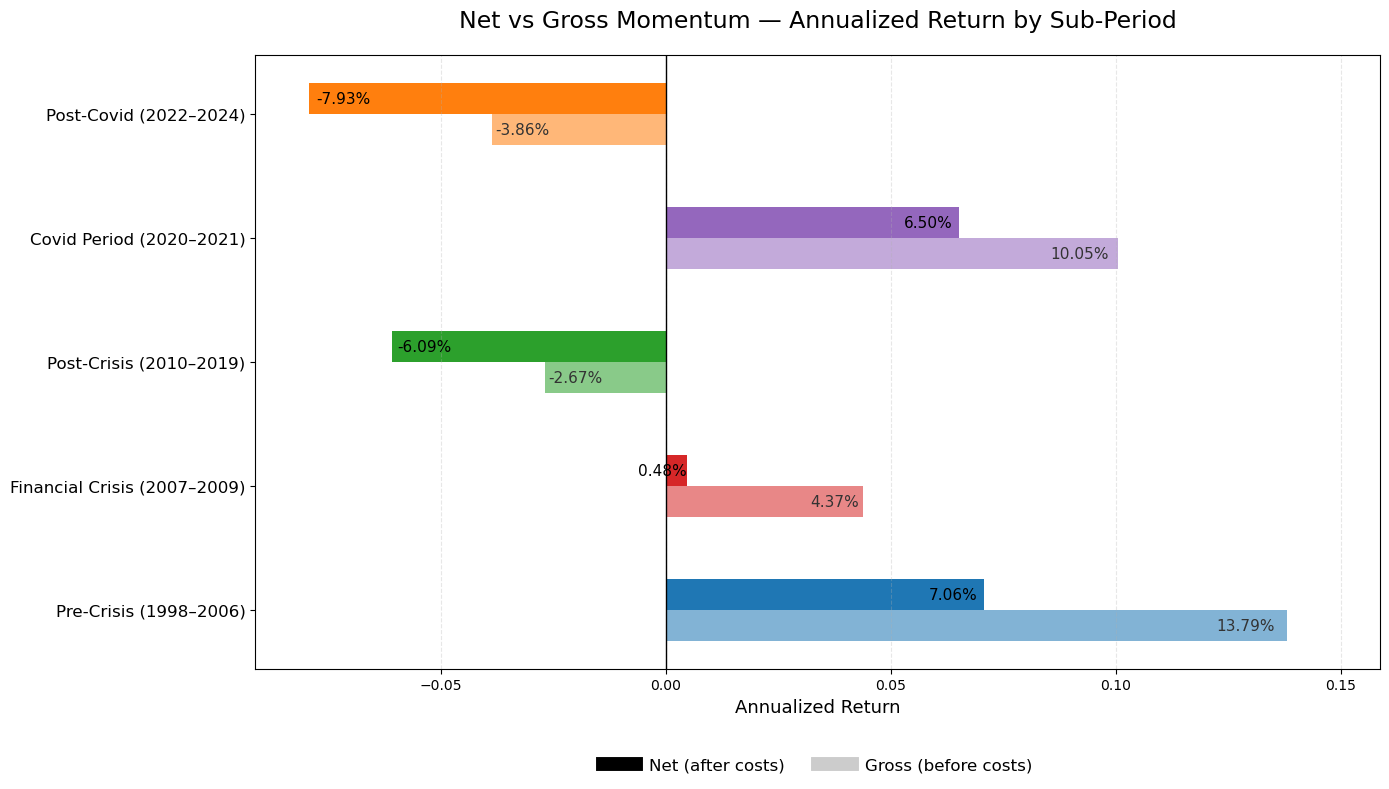

In [311]:
#displaying results

#Data

means_net = df_net["Mean (annualized)"]
means_gross = df_gross["Mean (annualized)"]
periods = df_net.index

offset = 0.12
n = len(periods)
y = np.arange(n)

#Color 
net_colors   = ["#1f77b4", "#d62728", "#2ca02c", "#9467bd", "#ff7f0e"]
gross_colors = [c + "55" for c in net_colors]  # same color, more transparent

fig, ax = plt.subplots(figsize=(14, 8))

bar_height = 0.25  

 
for i in range(n):
    ax.barh(
        y[i] - bar_height/2,
        means_gross.iloc[i],
        height=bar_height,
        color=gross_colors[i],
        edgecolor="none",
    )


for i in range(n):
    gross = means_gross.iloc[i]
    net   = means_net.iloc[i]

    
    ax.barh(y[i] - bar_height/2, gross, height=bar_height, color=gross_colors[i])

    #gross label inside bar
    txt_g = gross * 0.98
    ax.text(
        txt_g,
        y[i] - bar_height/2,
        f"{gross:.2%}",
        va="center",
        ha="right" if gross > 0 else "left",
        fontsize=11,
        color="#333"
    )

    
    ax.barh(y[i] + bar_height/2, net, height=bar_height, color=net_colors[i])

    #net label inside bar
    txt_n = net * 0.98
    ax.text(
        txt_n,
        y[i] + bar_height/2,
        f"{net:.2%}",
        va="center",
        ha="right" if net > 0 else "left",
        fontsize=11,
        color="black"
    )


#Aesthetics 
ax.set_yticks(y)
ax.set_yticklabels(periods, fontsize=12)

ax.axvline(0, color="black", linewidth=1)  

ax.set_xlabel("Annualized Return", fontsize=13)
ax.set_title("Net vs Gross Momentum — Annualized Return by Sub-Period",
             fontsize=17, pad=20)

ax.grid(axis="x", linestyle="--", alpha=0.3)


xmin = min(means_net.min(), means_gross.min()) * 1.15
xmax = max(means_net.max(), means_gross.max()) * 1.15
ax.set_xlim(xmin, xmax)

#Legend
legend_elements = [
    mlines.Line2D([], [], color="black", linewidth=10, label="Net (after costs)"),
    mlines.Line2D([], [], color="gray", linewidth=10, alpha=0.4, label="Gross (before costs)")
]

ax.legend(
    handles=legend_elements,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.12),
    ncol=2,
    fontsize=12,
    frameon=False
)

plt.tight_layout()
plt.show()


In [312]:
#Convert to monthly fwds

spot_m = fx_usd.resample("ME").last()
fwd_m  = fwd_usd.resample("ME").last()

spot_m = spot_m.apply(pd.to_numeric, errors="coerce")
fwd_m  = fwd_m.apply(pd.to_numeric, errors="coerce")

#Common currencies only
common_currencies = spot_m.columns.intersection(fwd_m.columns)
spot_m = spot_m[common_currencies]
fwd_m  = fwd_m[common_currencies]

#Common dates only
common_dates = spot_m.index.intersection(fwd_m.index)
spot_m = spot_m.loc[common_dates]
fwd_m  = fwd_m.loc[common_dates]

#PPP MISPRICING
PPP_mis = np.log(fwd_m / spot_m)


In [313]:
spot_m = fx_usd.resample("ME").last()
monthly_r = -np.log(spot_m / spot_m.shift(1))
monthly_r = monthly_r.dropna()


In [314]:
common_idx = monthly_r.index.intersection(PPP_mis.index)
monthly_r_m = monthly_r.loc[common_idx]
PPP_mis_m   = PPP_mis.loc[common_idx]

#Lag signals by 1 month
PPP_mis_lag = PPP_mis_m.shift(1)

#Remove first row (no signal available)
mask = PPP_mis_lag.notna().all(axis=1)
monthly_r_m = monthly_r_m.loc[mask]
PPP_mis_lag = PPP_mis_lag.loc[mask]


In [315]:
#Rank from cheap to expensive
PPP_ranks = PPP_mis_lag.rank(axis=1, ascending=False)

# Cheap = top 5 ranks 
PPP_P1 = PPP_ranks.apply(lambda r: list(r.nsmallest(5).index), axis=1)

# Expensive = bottom 5 ranks 
PPP_P5 = PPP_ranks.apply(lambda r: list(r.nlargest(5).index), axis=1)


In [316]:
#P1 long (cheap currencies)
PPP_P1_r = monthly_r_m.apply(
    lambda row: row.loc[PPP_P1.loc[row.name]].mean(), axis=1
)

#P5 short (expensive currencies)
PPP_P5_r = monthly_r_m.apply(
    lambda row: row.loc[PPP_P5.loc[row.name]].mean(), axis=1
)

PPP_value_gross = PPP_P1_r - PPP_P5_r
PPP_value_gross.name = "PPP Value Gross"

PPP_value_gross.head()


Date
2004-05-31   -0.017262
2004-06-30    0.015549
2004-07-31    0.012091
2004-08-31   -0.002988
2004-09-30    0.009891
Freq: ME, Name: PPP Value Gross, dtype: float64

In [317]:
#Transaction costs

PPP_turn_P1 = turnover(PPP_P1)
PPP_turn_P5 = turnover(PPP_P5)

#Explicit cost
PPP_P1_explicit = PPP_turn_P1 * explicitc
PPP_P5_explicit = PPP_turn_P5 * explicitc

#Implicit 
PPP_P1_implicit = implicitc(PPP_P1, PPP_turn_P1, spread_monthly)
PPP_P5_implicit = implicitc(PPP_P5, PPP_turn_P5, spread_monthly)

#Total cost
PPP_P1_cost = PPP_P1_explicit + PPP_P1_implicit
PPP_P5_cost = PPP_P5_explicit + PPP_P5_implicit

#Net returns
PPP_value_net = PPP_value_gross - (PPP_P1_cost + PPP_P5_cost)
PPP_value_net.name = "PPP Value Net"


In [318]:
#PPP stats

def compute_stats2(series):
    series = series.dropna()
    stats = {}
    
    #Annualized
    stats["Annualized Mean"] = series.mean() * 12
    stats["Annualized Std"]  = series.std() * np.sqrt(12)
    stats["Skew"] = skew(series, nan_policy="omit")
    stats["Kurtosis"] = kurtosis(series, nan_policy="omit")

    #Monthly
    stats["Monthly Mean"] = series.mean()
    stats["Monthly Std"]  = series.std()

    return pd.Series(stats)

PPP_stats_gross = compute_stats2(PPP_value_gross)
PPP_stats_net   = compute_stats2(PPP_value_net)


print_stats_block("PPP Value Gross Performance:", PPP_stats_gross)
print_stats_block("PPP Value Net Performance:", PPP_stats_net)



PPP Value Gross Performance:
    Annualized Mean            0.000968
    Annualized Std             0.067727
    Skew                       0.846163
    Kurtosis                   5.426110
    Monthly Mean               0.000081
    Monthly Std                0.019551

PPP Value Net Performance:
    Annualized Mean           -0.087911
    Annualized Std             0.067774
    Skew                       0.868924
    Kurtosis                   5.369731
    Monthly Mean              -0.007326
    Monthly Std                0.019565



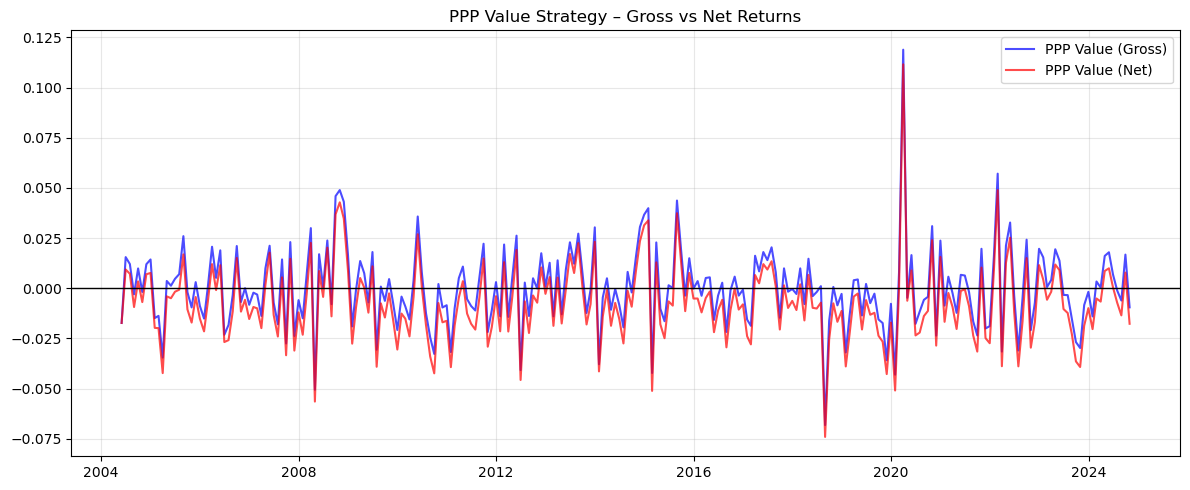

In [319]:
#PPP Gross vs Net Monthly Return Plot

plt.figure(figsize=(12,5))
plt.plot(PPP_value_gross, label="PPP Value (Gross)", color="blue", alpha=0.7)
plt.plot(PPP_value_net,   label="PPP Value (Net)",   color="red", alpha=0.7)

plt.axhline(0, color="black", linewidth=1)
plt.title("PPP Value Strategy – Gross vs Net Returns")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


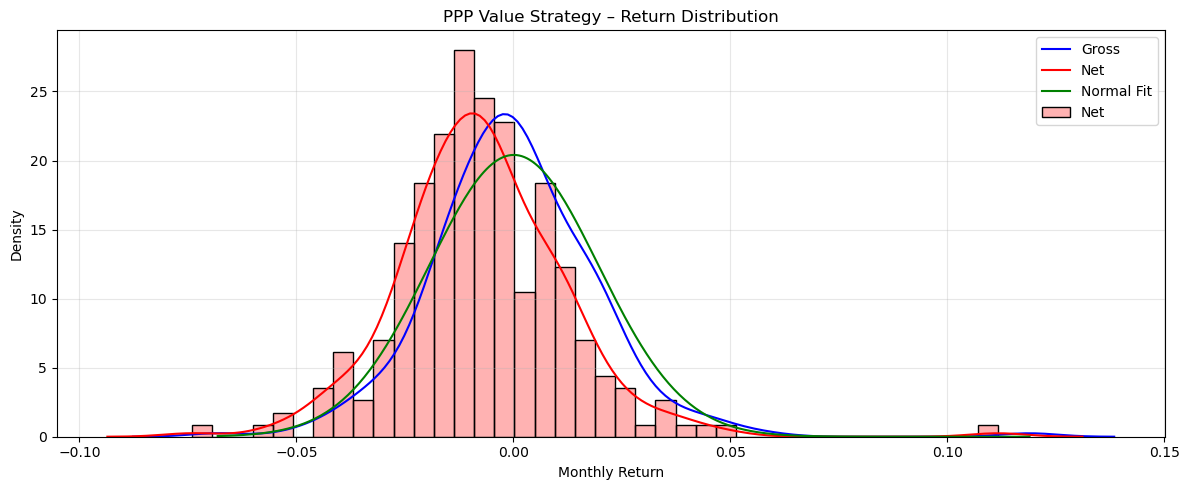

In [320]:
#PPP Return Distribution

plt.figure(figsize=(12,5))

sns.kdeplot(PPP_value_gross, color="blue", label="Gross")
sns.histplot(PPP_value_net, bins=40, stat="density", color="red", alpha=0.3, label="Net")
sns.kdeplot(PPP_value_net, color="red", label="Net")

mu, sigma = PPP_value_gross.mean(), PPP_value_gross.std()
x = np.linspace(PPP_value_gross.min(), PPP_value_gross.max(), 300)
plt.plot(x, norm.pdf(x, mu, sigma), color="green", label="Normal Fit")

plt.title("PPP Value Strategy – Return Distribution")
plt.xlabel("Monthly Return")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [321]:
grossPPP = PPP_value_gross
netPPP = PPP_value_net

results_grossPPP = {}
results_netPPP = {}

for name, (start, end) in sub_periods.items():
    results_grossPPP[name] = compute_stats(grossPPP.loc[start:end])
    results_netPPP[name] = compute_stats(netPPP.loc[start:end])


print("Gross PPP Strategy (Sub-Samples)")
df_grossPPP = pd.DataFrame(results_grossPPP).T
display(df_grossPPP)

df_netPPP = pd.DataFrame(results_netPPP).T

Gross PPP Strategy (Sub-Samples)


,Mean (monthly),Mean (annualized),Std (monthly),Std (annualized),Skew,Kurtosis,Sharpe (annualized)
Pre-Crisis (1998–2006),-0.000120,-0.001434,0.014108,0.048871,-0.231335,-0.331347,-0.029342
Financial Crisis (2007–2009),0.002205,0.026784,0.021898,0.075855,0.128694,0.007676,0.353093
Post-Crisis (2010–2019),-0.001214,-0.014473,0.017535,0.060743,-0.310814,1.433647,-0.238272
Covid Period (2020–2021),0.000924,0.011149,0.030384,0.105252,2.445048,7.654591,0.105927
Post-Covid (2022–2024),0.001994,0.024193,0.019359,0.067062,0.371154,0.462890,0.360756


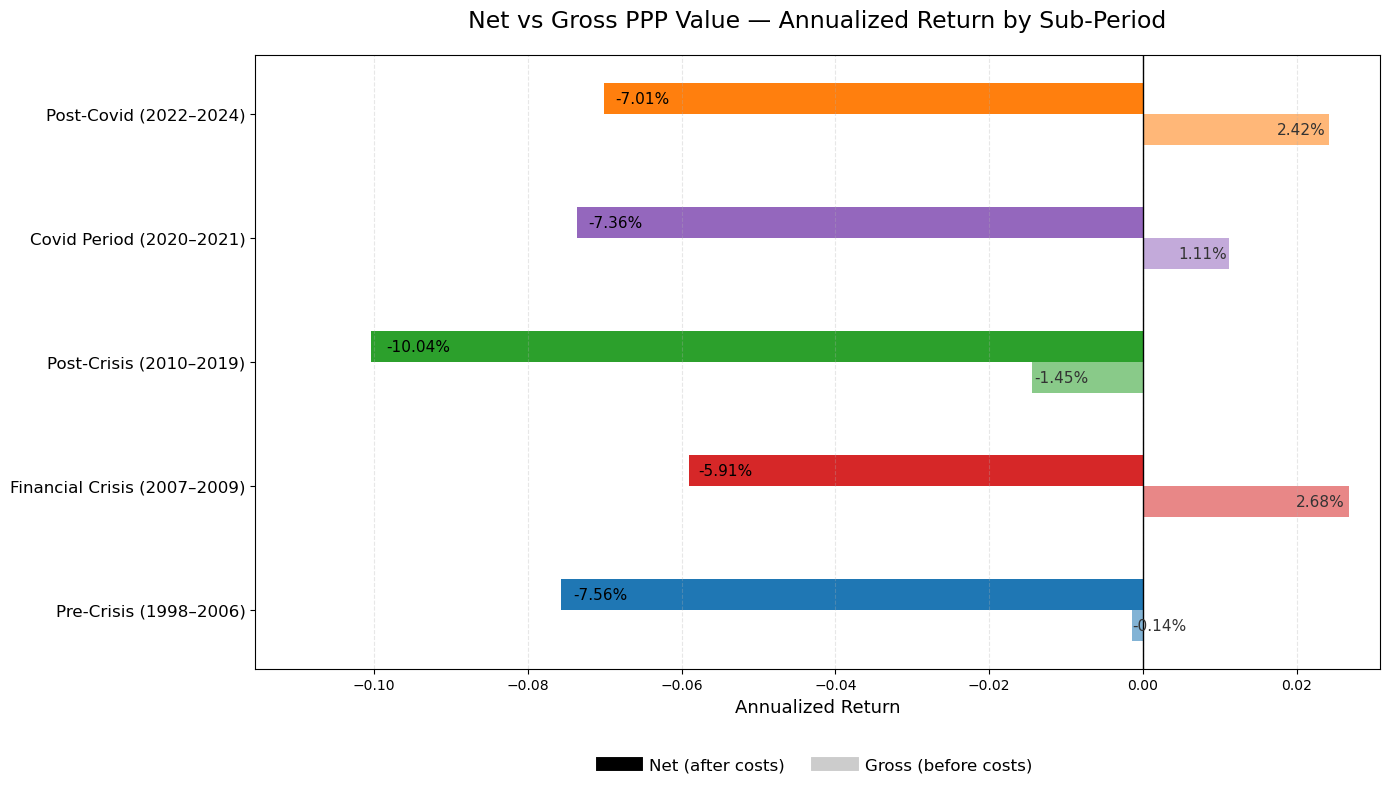

In [322]:
#Data
means_net   = df_netPPP["Mean (annualized)"]
means_gross = df_grossPPP["Mean (annualized)"]
periods     = df_netPPP.index

n = len(periods)
y = np.arange(n)

#Color 
net_colors   = ["#1f77b4", "#d62728", "#2ca02c", "#9467bd", "#ff7f0e"]
gross_colors = [c + "55" for c in net_colors]  # same color, more transparent

fig, ax = plt.subplots(figsize=(14, 8))

bar_height = 0.25  

 
for i in range(n):
    ax.barh(
        y[i] - bar_height/2,
        means_gross.iloc[i],
        height=bar_height,
        color=gross_colors[i],
        edgecolor="none",
    )


for i in range(n):
    gross = means_gross.iloc[i]
    net   = means_net.iloc[i]

    
    ax.barh(y[i] - bar_height/2, gross, height=bar_height, color=gross_colors[i])

    #gross label inside bar
    txt_g = gross * 0.98
    ax.text(
        txt_g,
        y[i] - bar_height/2,
        f"{gross:.2%}",
        va="center",
        ha="right" if gross > 0 else "left",
        fontsize=11,
        color="#333"
    )

    
    ax.barh(y[i] + bar_height/2, net, height=bar_height, color=net_colors[i])

    #net label inside bar
    txt_n = net * 0.98
    ax.text(
        txt_n,
        y[i] + bar_height/2,
        f"{net:.2%}",
        va="center",
        ha="right" if net > 0 else "left",
        fontsize=11,
        color="black"
    )


#Aesthetics 
ax.set_yticks(y)
ax.set_yticklabels(periods, fontsize=12)

ax.axvline(0, color="black", linewidth=1)  

ax.set_xlabel("Annualized Return", fontsize=13)
ax.set_title("Net vs Gross PPP Value — Annualized Return by Sub-Period",
             fontsize=17, pad=20)

ax.grid(axis="x", linestyle="--", alpha=0.3)


xmin = min(means_net.min(), means_gross.min()) * 1.15
xmax = max(means_net.max(), means_gross.max()) * 1.15
ax.set_xlim(xmin, xmax)

#Legend
legend_elements = [
    mlines.Line2D([], [], color="black", linewidth=10, label="Net (after costs)"),
    mlines.Line2D([], [], color="gray", linewidth=10, alpha=0.4, label="Gross (before costs)")
]

ax.legend(
    handles=legend_elements,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.12),
    ncol=2,
    fontsize=12,
    frameon=False
)

plt.tight_layout()
plt.show()


In [323]:
#Final metrics MoM vs PPP 
comparison = pd.DataFrame({
    "MoM Gross" : [
        gross_stats["Annualized Mean"],
        gross_stats["Annualized Std"]
    ],
    "MoM Net" : [
        net_stats["Annualized Mean"],
        net_stats["Annualized Std"]
    ],
    "PPP Gross" : [
        PPP_stats_gross["Annualized Mean"],
        PPP_stats_gross["Annualized Std"]
    ],
    "PPP Net" : [
        PPP_stats_net["Annualized Mean"],
        PPP_stats_net["Annualized Std"]
    ]
}, index=["Annualized Mean", "Annualized Std"])

comparison


,MoM Gross,MoM Net,PPP Gross,PPP Net
Annualized Mean,0.041014,-0.004325,0.000968,-0.087911
Annualized Std,0.086314,0.083247,0.067727,0.067774


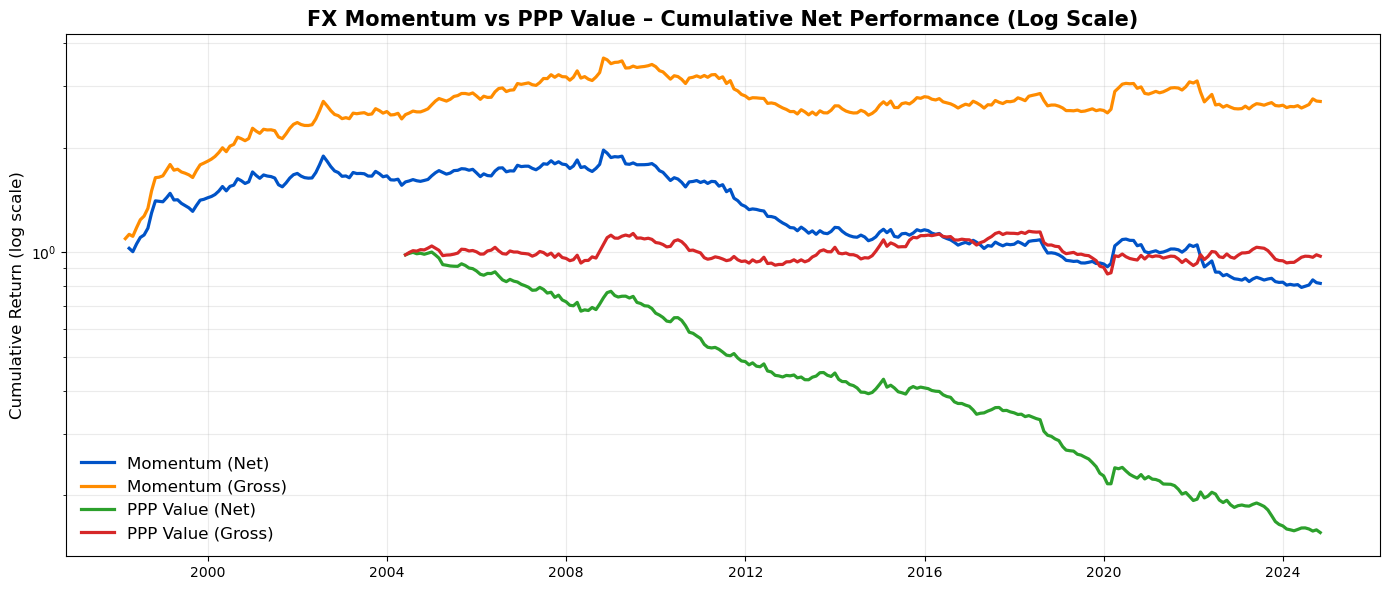

In [324]:
#Cumulative returns

cum_mom_gross = (1 + MoM_r["Momentum Strategy"].dropna()).cumprod()
cum_mom_net   = (1 + MoM_netr["Net Momentum"].dropna()).cumprod()

cum_ppp_gross = (1 + PPP_value_gross.dropna()).cumprod()
cum_ppp_net   = (1 + PPP_value_net.dropna()).cumprod()

plt.figure(figsize=(14,6))

plt.plot(cum_mom_net,   label="Momentum (Net)",   color="#0053C7", linewidth=2.3)  
plt.plot(cum_mom_gross, label="Momentum (Gross)", color="#FF8C00", linewidth=2.3)  
plt.plot(cum_ppp_net,   label="PPP Value (Net)",  color="#2CA02C", linewidth=2.3)  
plt.plot(cum_ppp_gross, label="PPP Value (Gross)",color="#D62728", linewidth=2.3)  

plt.yscale("log")   

plt.title("FX Momentum vs PPP Value – Cumulative Net Performance (Log Scale)",
          fontsize=15, fontweight="bold")

plt.ylabel("Cumulative Return (log scale)", fontsize=12)
plt.grid(alpha=0.25, which='both')

plt.legend(fontsize=12, frameon=False)
plt.tight_layout()



plt.show()

